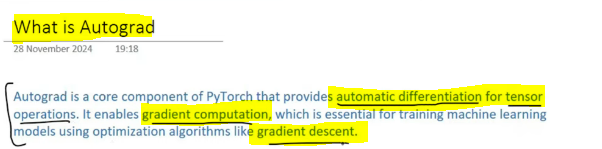

In [ ]:
## Autograd
## to update the gradients by taking derivative of each steps

In [ ]:
import torch

In [ ]:
x= torch.tensor(2.0, requires_grad=True)

In [ ]:
y = x**2

In [ ]:
y

tensor(4., grad_fn=<PowBackward0>)

In [ ]:
## now caculate, dy/dx (derivative)
## you can see, grad functio with y (grad_fn=<PowBackward0>)

## to caluclate the derivate
y.backward()

In [ ]:
x.grad ## gradient

tensor(4.)

## find the gradient of x**3

In [ ]:
x= torch.tensor(2.0, requires_grad=True)
y= x**3

In [ ]:
y

tensor(8., grad_fn=<PowBackward0>)

In [ ]:
y.backward()

In [ ]:
## Here's the gradient of x**3
x.grad

tensor(12.)

## **now more ccomplex term:**
**y = x**2**, z= sin(y)**

In [ ]:
x= torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [ ]:
z= torch.sin(y)
z

tensor(-0.7568, grad_fn=<SinBackward0>)

In [ ]:
## hence backpropogration: gradient of x is
z.backward()

In [ ]:
# gradient of x is
x.grad

tensor(-2.6146)

In [ ]:
y.grad ## you can not calculate gradient of intermiddiate nodes (leaf)

<ipython-input-45-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [ ]:
z.grad

<ipython-input-46-1ee473f924b8>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  z.grad


In [ ]:
x.grad ## only grad of starting node is accessible

tensor(-2.6146)

#### manuallty above function derivative will be
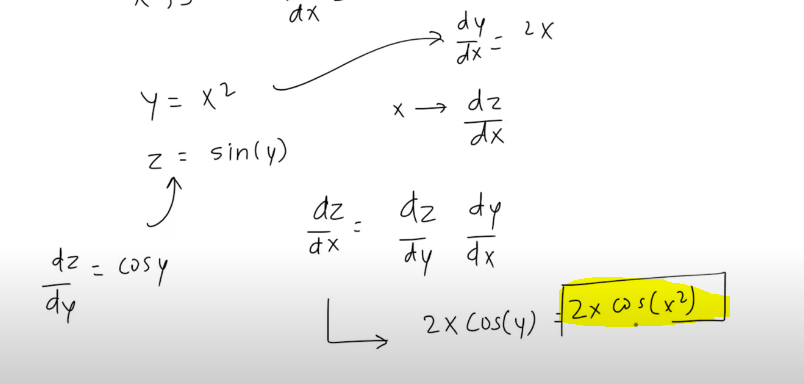

In [ ]:
## let's perform manually
import math
a= 2
2*a*math.cos((a**2))

-2.6145744834544478

In [ ]:
## as you can see above manual calculations matches with gradient caluclated using backword function

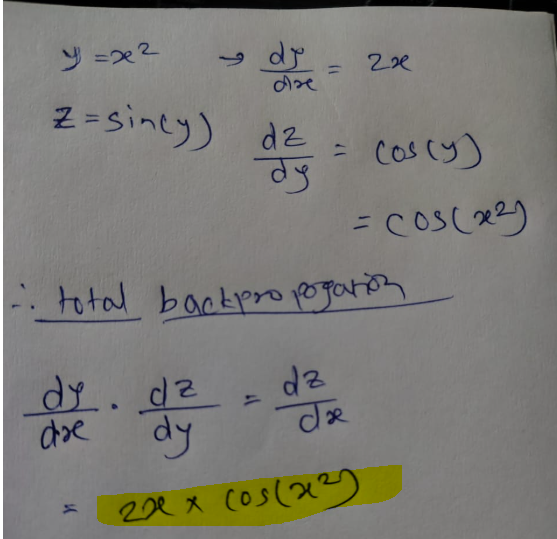

> Add blockquote



# **In real word scenarion, we have large & complex nueral network, It's hard to code & calculate the derivative (or backpropogate) these n/w manually,  Hence we use ```autograd & backwrod function```**

# **How nueral network trained**
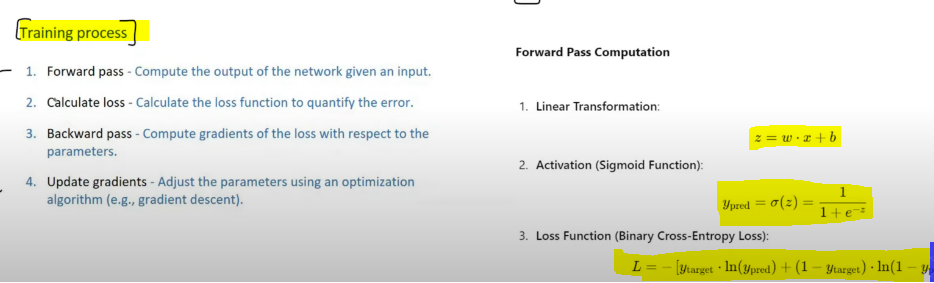

In [ ]:
def Binary_cross_entropyLoss(prediction, target):
  epsilon= 1e-8
  prediction= torch.clamp(prediction, epsilon, 1-epsilon)
  loss= -(target*torch.log(prediction)+(1-target)*torch.log(1-prediction))
  return loss

In [ ]:
x= torch.tensor(6.5) # input
y = torch.tensor(0.0) # actual y

w= torch.tensor(1.0, requires_grad=True) # weight random
b= torch.tensor(0.0,  requires_grad=True) # bias term

In [ ]:
# y = mx +b
z= w * x+ b
z

tensor(6.5000, grad_fn=<AddBackward0>)

In [ ]:
y_pred= torch.sigmoid(z)
y_pred

tensor(0.9985, grad_fn=<SigmoidBackward0>)

In [ ]:
binary_loss= Binary_cross_entropyLoss(y_pred, y)
binary_loss

tensor(6.5015, grad_fn=<NegBackward0>)

In [ ]:
## now back propogate
binary_loss.backward()

In [ ]:
print(f"Gradient of weight :{w.grad}")
print(f"Gradient of bias   :{b.grad}")

Gradient of weight :6.490242004394531
Gradient of bias   :0.998498797416687


# **You can also pass vector input: to caluclate grad**

In [ ]:
x= torch.tensor([1.2,2.2,4.0], requires_grad=True)
x

tensor([1.2000, 2.2000, 4.0000], requires_grad=True)

In [ ]:
y = (x**2).mean()
y

tensor(7.4267, grad_fn=<MeanBackward0>)

In [ ]:
y.backward()

In [ ]:
x.grad # now we have three grads, one for each

tensor([0.8000, 1.4667, 2.6667])

# **cleaning the grad is very important during training**
# **Once we backpropogate, we have to clearn the gradient using (x.grad.zero_())**

In [ ]:
#clearing the grad
x= torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [ ]:
y= x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [ ]:
y.backward()

In [ ]:
x.grad ## we run forward pass many time, our gradient doesn't cleanup, so it changes contineously
# hence it's important to clean the gradient

tensor(4.)

In [ ]:
# to clear gradient
x.grad.zero_()

tensor(0.)

In [ ]:
x.zero_grad()

AttributeError: 'Tensor' object has no attribute 'zero_grad'

In [ ]:
x.grad

tensor(0.)

# **To disable the gradient tracking during: Prediction**

In [ ]:
## option 1- requires_grad_(False)
## Option 2- detach()
## Option 3- torch.no_grad()